# Calculation of Potential Customer Return with Rule-Based Classification

## About this project: The company aims to create level-based new customer personas using some characteristics of its existing customers. It also wants to estimate the potential average earnings that new customers from these personas can bring to the company by creating segments based on these new customer personas and predicting the potential revenue from customers who may come based on these segments.

## For example: It is desired to determine the potential average earnings of a 25-year-old male user from Turkey who is an iOS user.

# Story of the Dataset

## The persona.csv dataset contains the prices of products sold by an international gaming company and includes some demographic information of the users who purchased these products. The dataset is derived from records generated in each sales transaction. This means that a user with specific demographic characteristics may have made multiple purchases.

# About the variables in the dataset

## PRICE - The amount spent by the customer. 
## SOURCE - The type of device the customer is connected with.
## SEX - The gender of the customer.
## COUNTRY - The country of the customer.
## AGE - The age of the customer.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("persona.csv")
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,5000.0,34.1320,12.464897,9.0,29.0,39.0,39.0,59.0
AGE,5000.0,23.5814,8.995908,15.0,17.0,21.0,27.0,66.0


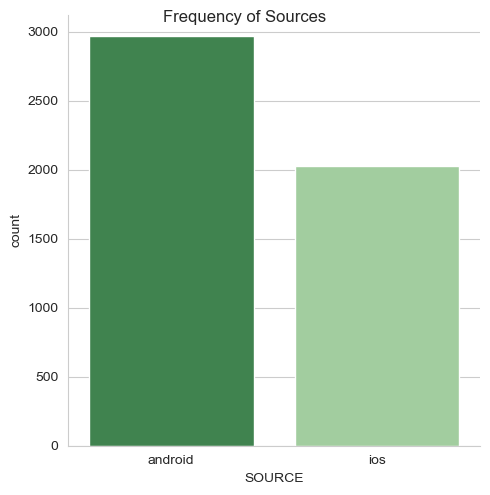

####################### Detailed Info #######################
android    2974
ios        2026
Name: SOURCE, dtype: int64


In [5]:
sns.set_style("whitegrid")
sns.set_palette("PRGn_r")
g1 = sns.catplot(x="SOURCE", 
            kind="count",
            data=df)
g1.fig.suptitle("Frequency of Sources")
plt.show()
print("####################### Detailed Info #######################")
print(df["SOURCE"].value_counts())

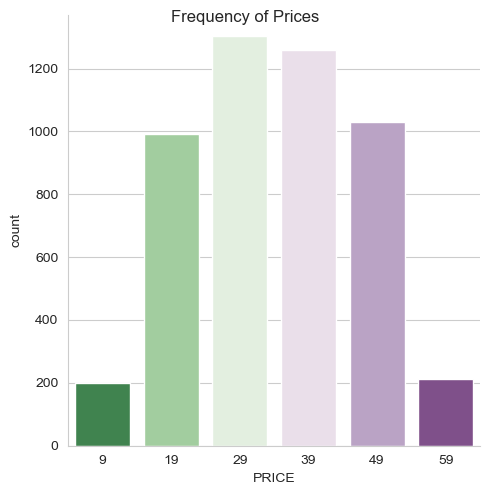

####################### Detailed Info #######################
9      200
59     212
19     992
49    1031
39    1260
29    1305
Name: PRICE, dtype: int64


In [6]:
g2 = sns.catplot(x="PRICE",
               kind="count",
               data=df)
g2.fig.suptitle("Frequency of Prices")
plt.show()
print("####################### Detailed Info #######################")
print(df["PRICE"].value_counts(ascending=True))

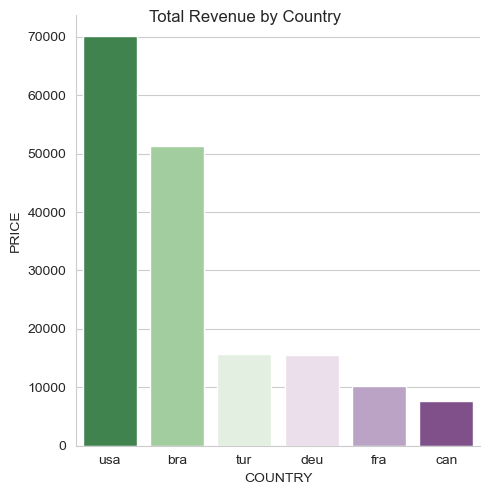

####################### Detailed Info #######################


,COUNTRY,PRICE
0,usa,70225
1,bra,51354
2,tur,15689
3,deu,15485
4,fra,10177
5,can,7730


In [7]:
tot_country = df.groupby("COUNTRY").agg({"PRICE" : "sum"}).sort_values(by="PRICE", ascending=False)
tot_country.reset_index(inplace=True)
g3 = sns.catplot(x="COUNTRY",
                y="PRICE",
                kind="bar",
                data=tot_country)
g3.fig.suptitle("Total Revenue by Country")
plt.show()
print("####################### Detailed Info #######################")
tot_country

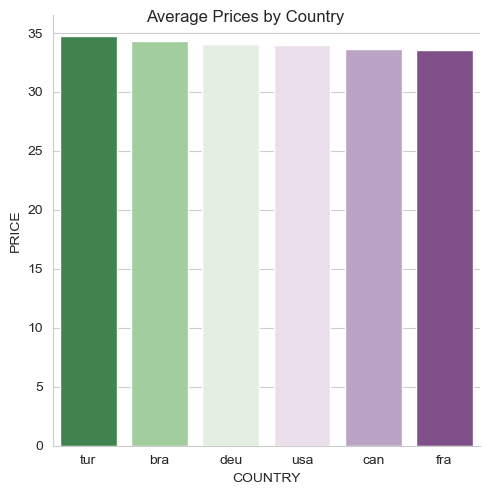

####################### Detailed Info #######################


,COUNTRY,PRICE
0,tur,34.787140
1,bra,34.327540
2,deu,34.032967
3,usa,34.007264
4,can,33.608696
5,fra,33.587459


In [8]:
avg_country = df.groupby("COUNTRY").agg({"PRICE" : "mean"}).sort_values(by="PRICE", ascending=False)
avg_country.reset_index(inplace=True)
g4 = sns.catplot(x="COUNTRY",
                y="PRICE",
                kind="bar",
                data=avg_country)
g4.fig.suptitle("Average Prices by Country")
plt.show()
print("####################### Detailed Info #######################")
avg_country

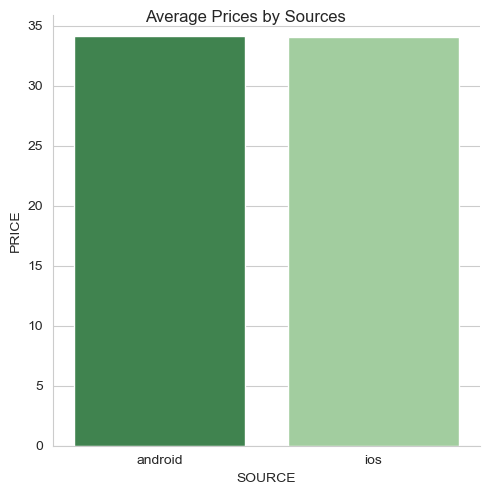

####################### Detailed Info #######################


,SOURCE,PRICE
0,android,34.174849
1,ios,34.069102


In [9]:
avg_price_source = df.groupby("SOURCE").agg({"PRICE" : "mean"}).sort_values(by="PRICE", ascending=False)
avg_price_source.reset_index(inplace=True)
g5 = sns.catplot(x="SOURCE",
                y="PRICE",
                kind="bar",
                data=avg_price_source)
g5.fig.suptitle("Average Prices by Sources")
plt.show()
print("####################### Detailed Info #######################")
avg_price_source

In [10]:
df.groupby(["COUNTRY","SOURCE"])["PRICE"].agg({"mean"})

mean
COUNTRY SOURCE            
bra     android  34.387029
        ios      34.222222
can     android  33.330709
        ios      33.951456
deu     android  33.869888
        ios      34.268817
fra     android  34.312500
        ios      32.776224
tur     android  36.229437
        ios      33.272727
usa     android  33.760357
        ios      34.371703

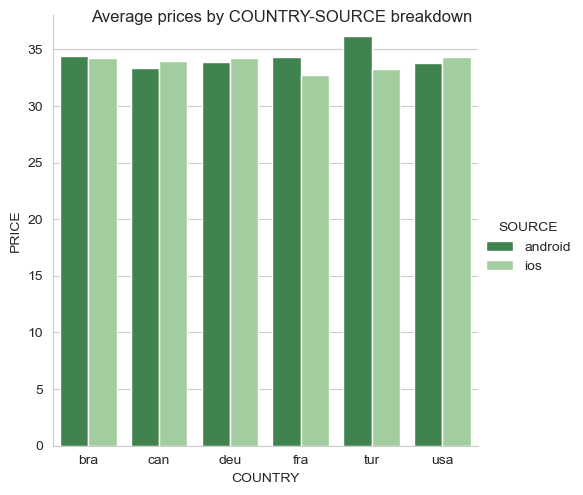

####################### Detailed Info #######################


,COUNTRY,SOURCE,PRICE
0,bra,android,34.387029
1,bra,ios,34.222222
2,can,android,33.330709
3,can,ios,33.951456
4,deu,android,33.869888
5,deu,ios,34.268817
6,fra,android,34.312500
7,fra,ios,32.776224
8,tur,android,36.229437
9,tur,ios,33.272727


In [11]:
avg_cs = df.groupby(["COUNTRY","SOURCE"]).agg({"PRICE" : "mean"})
avg_cs.reset_index(inplace=True)
g5 = sns.catplot(x="COUNTRY",
                y="PRICE",
                kind="bar",
                hue="SOURCE",
                data=avg_cs)
g5.fig.suptitle("Average prices by COUNTRY-SOURCE breakdown")
plt.show()
print("####################### Detailed Info #######################")
avg_cs

In [12]:
df2 = df.groupby(["COUNTRY","SOURCE","SEX","AGE"]).agg({"PRICE" : "mean"}).sort_values(by="PRICE", ascending=False)
df2.reset_index(inplace=True)
df2.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0


In [13]:
df2["AGE_CAT"] = pd.cut(df2["AGE"], bins = [0, 18, 23, 30, 40, 70], labels = ['0_18', '19_23', '24_30', '31_40', '41_70'])
df2.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT
0,bra,android,male,46,59.0,41_70
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,24_30
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40


In [20]:
df3 = df2["COUNTRY"] + "_" + df2["SOURCE"] + "_" + df2["SEX"] + "_" + df2["AGE_CAT"].astype(str)
df3 = pd.concat([df3, df2["PRICE"]], axis = 1)
df3.columns = ["customers_level_based", "PRICE"]
df3["customers_level_based"] = df3["customers_level_based"].str.upper()
df3 = df3.groupby("customers_level_based").agg({"PRICE" : "mean"}).reset_index()
df3["SEGMENT"] = pd.qcut(df3["PRICE"], 4, labels = ["D","C","B","A"])
df3

,customers_level_based,PRICE,SEGMENT
0,BRA_ANDROID_FEMALE_0_18,35.645303,B
1,BRA_ANDROID_FEMALE_19_23,34.077340,C
2,BRA_ANDROID_FEMALE_24_30,33.863946,C
3,BRA_ANDROID_FEMALE_31_40,34.898326,B
4,BRA_ANDROID_FEMALE_41_70,36.737179,A
...,...,...,...
104,USA_IOS_MALE_0_18,33.983495,C
105,USA_IOS_MALE_19_23,34.901872,B
106,USA_IOS_MALE_24_30,34.838143,B
107,USA_IOS_MALE_31_40,36.206324,A


In [23]:
df3.groupby("SEGMENT").agg({"PRICE" : ["mean", "max", "min", "sum"]}).sort_values(by="SEGMENT", ascending=False)

PRICE                                   
              mean        max        min          sum
SEGMENT                                              
A        38.691234  45.428571  36.060606  1044.663328
B        34.999645  36.000000  34.103727   944.990411
C        33.509674  34.077340  32.500000   904.761209
D        29.206780  32.333333  19.000000   817.789833

## A 33-year-old Turkish woman who uses ANDROID belongs to which segment, and what is the expected average income she is likely to generate?

In [24]:
new_user_tr = "TUR_ANDROID_FEMALE_31_40"
df3[df3["customers_level_based"] == new_user_tr]

,customers_level_based,PRICE,SEGMENT
72,TUR_ANDROID_FEMALE_31_40,41.833333,A


In [1]:
# The expected average income she is likely to generate is 41.83

## A 35-year-old French woman who uses IOS belongs to which segment, and what is the expected average income she is likely to generate?

In [26]:
new_user_fr = "FRA_IOS_FEMALE_31_40"
df3[df3["customers_level_based"] == new_user_fr]

,customers_level_based,PRICE,SEGMENT
63,FRA_IOS_FEMALE_31_40,32.818182,C


In [2]:
# The expected average income she is likely to generate is 32.81